In [26]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 04 17:45:43 2018 @author: wsLu
"""
from math import *
import scipy.constants as const
from scipy.special import ellipk
import numpy as np
import matplotlib.pyplot as plt

roundN = 5

def JJparameters(RN, JJwidthUM=0.2, metalTHK=250E-10, Tc=1.34):
    
    Rs_JJ = RN / ( (JJwidthUM/1E-6 + 2*metalTHK) *JJwidthUM/1E-6 )
    IAB = const.pi *1.764 *const.k *Tc /2 /const.e /RN 
    EJ_JJ = const.h /2 /const.e /2 /const.pi *IAB
    C_JJ = 50E-15 *JJwidthUM *JJwidthUM 
    EC_JJ = const.e *const.e /2 /C_JJ
    C0 = ParplateCap(area= 56*1E-12 , dielecTHK=10E-9, epsilon = 9.34*const.epsilon_0)
#    C0 = 1E-99
    EC0 = const.e *const.e /2 /C0
    
    freqPlasma = sqrt(2 *const.e *IAB *2*const.pi /const.h /max(C0,C_JJ)) /2/const.pi
    Q = freqPlasma*2*pi *RN *max(C0,C_JJ)
#    ParplateCap(area= JJwidthUM*JJwidthUM*1E-12 , dielecTHK=1E-9, epsilon = 9.34*8.828E-12)
#    return [IAB, EJ]
    return "[RN_JJ (kohm), Rs_JJ (kohm/um^2)] = " + format([round(RN/1E3, roundN), round(Rs_JJ/1E3/1E-12, roundN)]) + "\n[I_AB (nA), EJ (mK)] = " + format([round(IAB/1E-9, roundN), round(EJ_JJ/1E-3/const.k, roundN)]) + "\n[C_JJQP (fF), EC (mK)] = " + format([round(C_JJ/1E-15, roundN), round(EC_JJ/1E-3/const.k, roundN)]) + "\n[C0 (fF), EC0 (mK)] = " + format([round(C0/1E-15, roundN), round(EC0/1E-3/const.k, roundN)]) + "\n[Freq_plasma (GHz))] = " + format([round(freqPlasma/1E9, roundN)])+ "\n[Q, Beta, EJ/EC] = " + format([round(Q, 1), round(Q*Q, 1), round(EJ_JJ/min(EC0,EC_JJ), 1)])
#    return RN, round(Rs_JJ/1E3/1E-12, roundN), IAB, EJ_JJ/const.k, round(C_JJ/1E-15, roundN), round(EC_JJ/1E-3/const.k, roundN), round(C0/1E-15, roundN), round(EC0/1E-3/const.k, roundN), round(freqPlasma/1E9, roundN), round(Q, 1), round(Q*Q, 1), round(EJ_JJ/min(EC0,EC_JJ), 1)

def CfromIVCoffset(IVCoffset):
    """
    Extract C from IV curve V offset for high Ibias branch with V = IR +e/2C
    IVCoffset: V offset from linear fits of IVC at high Ibias branch (V)
    return: C per JJ (fF/JJ)
    """
    C = const.e /2 /IVCoffset *1E15 *30 /2
#    return C
    return "C_IVCoffset/JJ (fF/JJ) = " + format(round(C, roundN))

def ParplateCap(area, dielecTHK, epsilon = 9.34*const.epsilon_0):
    """
    """
    C = epsilon *area /dielecTHK
    return C
#    return "C_parallelPlate (fF) = " + format(C *1E15)

def tiltedWashboardU(EJKBT, IbiasArr):

   phi = np.arange(-0.1*np.pi, 8*np.pi, 0.025*np.pi)
   UArr=[]
   for Ibias in IbiasArr:
       U = -EJKBT*const.k*np.cos(phi) - const.h /2/np.pi /2/const.e *Ibias *phi
       UArr.append(U)

   fig = plt.figure()
   ax = fig.add_subplot(111)
   ax.set_title('Tilted washboard', fontsize=16, fontweight='bold')
   ax.set_xlabel('$\phi$ (pi)')
   ax.set_ylabel('U (K)')

   i = 0   
   for U in UArr:
       ax.plot(phi/np.pi, U/const.k,)
       ax.text(0.02, 0.06*i, 'I$_b$ =' + format(IbiasArr[i], '.2E') + ' A', verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,color='C'+format(i), fontsize=12)
       i = i+1

   ax.text(0.82, 0.94, 'E$_J$ =' + format(EJKBT) + ' K\n', verticalalignment='bottom', horizontalalignment='left',transform=ax.transAxes,color='black', fontsize=12)
   ax.grid(True)

   ax.axis([-0.5, 8.5, -22, 2])
   plt.show()
   

In [27]:
#print (CfromIVCoffset(1.87E-3))

In [28]:
print (JJparameters(RN=7E3, JJwidthUM=0.2, metalTHK=250E-10, Tc=1.34))

[RN_JJ (kohm), Rs_JJ (kohm/um^2)] = [7.0, 175.0]
[I_AB (nA), EJ (mK)] = [45.7086, 1089.5586]
[C_JJQP (fF), EC (mK)] = [2.0, 464.81235]
[C0 (fF), EC0 (mK)] = [463.10944, 2.00735]
[Freq_plasma (GHz))] = [2.75619]
[Q, Beta, EJ/EC] = [56.1, 3151.7, 542.8]


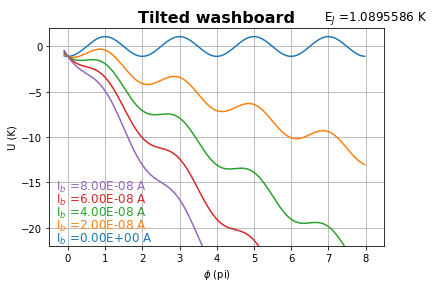

In [29]:
tiltedWashboardU(1089.5586E-3, np.arange(0E-9, 100E-9, 20E-9))

In [ ]:
# 